# Imports

In [1]:
import pandas as pd
import numpy as np

import unicodedata
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.core.display import display, HTML

import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

%matplotlib inline

# Data

In [2]:
df = pd.read_csv('data/postings.csv')

In [3]:
resume = None

with open('data/Liveproject Resume.txt') as file_handle:
    resume = file_handle.read()

In [4]:
df.head()

,job_posting,title,body,bullets
0,3157fcef3ee474da_fccid.html,"Data Scientist - Mountain View, CA","Data Scientist - Mountain View, CA\nGroundTrut...","('Help senior members of the team to explore, ..."
1,b423ca22a6e2c10f_fccid.html,"Data Scientist - Seattle, WA","Data Scientist - Seattle, WA\nA Bachelor or Ma...",('A Bachelor or Masters Degree in a highly qua...
2,a559b6630c13783d_fccid.html,"Junior Data Scientist - College Park, MD 20740","Junior Data Scientist - College Park, MD 20740...",('Degree: Bachelor’s degree in business analyt...
3,f579e807b5804620_fccid.html,"Data Scientist - New York, NY","Data Scientist - New York, NY\nDescription\nDS...","('Languages: Python, PySpark, SQL', 'Data Tool..."
4,13c9ffc0bcb07c8d_fccid.html,"(Entry-Level) Data Scientist - Chicago, IL","(Entry-Level) Data Scientist - Chicago, IL\nDa...",('Be the go-to person for Data ingest and stor...


In [5]:
df.shape

(547, 4)

# Data Cleaning

In [6]:
stop_words = stopwords.words('english')

In [7]:
def clean_text(text):

    p_text = text.translate(str.maketrans('', '', string.punctuation))
    p_text = p_text.translate(str.maketrans('', '', string.digits))
    p_text = unicodedata.normalize('NFKD', p_text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')\
                        .replace('\n\t', ' ')\
                        .replace('\n', ' ')\
                        .replace('  ', ' ')\
                        .replace('   ', ' ')\
                        .rstrip()\
                        .lower()

    p_text = ' '.join([word for word in word_tokenize(p_text) if word not in stop_words])
    return p_text

In [8]:
df['requirements'] = df.bullets.values

In [9]:
df.requirements = df.requirements.apply(lambda x: x[1:-1])

In [10]:
df.requirements

0      'Help senior members of the team to explore, d...
1      'A Bachelor or Masters Degree in a highly quan...
2      'Degree: Bachelor’s degree in business analyti...
3      'Languages: Python, PySpark, SQL', 'Data Tools...
4      'Be the go-to person for Data ingest and stora...
                             ...                        
542    'Applicable degree(s): Computer Information Sy...
543    'Experience with Python', 'Knowledge of some o...
544                                                     
545    'Independently develop advanced analytics and ...
546    'Experienced in handling large data sets using...
Name: requirements, Length: 547, dtype: object

In [11]:
df.requirements = df.requirements.apply(clean_text)

In [12]:
df.requirements.head(n=1).values

array(['help senior members team explore develop productionize optimize machine learning algorithms pipelines use hadoop spark amazon athena daily basis explore petabytes data dive deep rich set location data derive insights build product prototypes collaborate peer data scientists engineers product managers closely master degree computer science statistics mathematics engineering phd plus experience statistics machine learning fluency python significant experience sql relational databases nosql data stores familiarity open source machine learning libraries scikitlearn spark mllib experience amazon web services plus excellent communication skills'],
      dtype=object)

In [13]:
print(resume)

﻿Good Student
Data Scientist
	  

Good Student
123 Fake Street
Some City, QT 12345
123.456.7890
no_reply@fakesite.com
	ㅡ
Skills
	  

Python, Pandas, machine learning, natural language processing
	ㅡ
Experience
	  

Manning / Data Analyst
Oct 2019 - PRESENT,  REMOTE
Analyzed and visualized vast amounts of data using Pandas, Python, and Matplotlib.
	ㅡ
Education
	  

Berkeley / B.S. Mathematics
August 2015 - May 2019,  BERKELEY, CA
Graduated summa cum laude.

	ㅡ
Awards
	  

Tau Beta Pi Honors Society



In [14]:
resume_clean = clean_text(resume)

In [15]:
print(resume_clean)

good student data scientist good student fake street city qt noreplyfakesitecom skills python pandas machine learning natural language processing experience manning data analyst oct present remote analyzed visualized vast amounts data using pandas python matplotlib education berkeley bs mathematics august may berkeley ca graduated summa cum laude awards tau beta pi honors society


# Most Similar Job Postings

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [17]:
all_text = [resume_clean] + list(df.requirements.values)

In [18]:
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

In [19]:
tfidf_matrix.shape

(548, 6916)

In [20]:
tfidf_matrix

<548x6916 sparse matrix of type '<class 'numpy.float64'>'
	with 68149 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_matrix[1:]

<547x6916 sparse matrix of type '<class 'numpy.float64'>'
	with 68104 stored elements in Compressed Sparse Row format>

In [22]:
tfidf_np_array = tfidf_matrix.toarray()

In [23]:
tfidf_np_array.shape

(548, 6916)

In [24]:
resume_vector = tfidf_np_array[0]

In [25]:
resume_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
resume_non_zero_indicese = np.flatnonzero(resume_vector)

In [27]:
resume_non_zero_indicese

array([ 262,  276,  291,  498,  536,  622,  627,  727,  762,  925, 1411,
       1458, 1920, 2207, 2303, 2633, 2661, 2841, 3376, 3395, 3425, 3613,
       3669, 3722, 3732, 4055, 4183, 4255, 4432, 4597, 4767, 4829, 5015,
       5033, 5255, 5527, 5737, 5779, 6000, 6021, 6077, 6194, 6627, 6674,
       6741])

In [28]:
tfidf_vectorizer.get_feature_names()[6741]

'visualized'

In [29]:
resume_vector[439]

0.0

In [30]:
cosine_similarities = tfidf_np_array @ resume_vector

In [31]:
cosine_similarities.shape

(548,)

In [32]:
cosine_similarities

array([1.        , 0.03277557, 0.03779801, 0.01933858, 0.05096556,
       0.04777116, 0.01769653, 0.03750628, 0.02460573, 0.03870864,
       0.00565752, 0.03502604, 0.02597396, 0.01620932, 0.03479699,
       0.04369249, 0.01818711, 0.0612223 , 0.        , 0.06642942,
       0.02879421, 0.06090079, 0.02242816, 0.02038032, 0.03633094,
       0.0247229 , 0.03777949, 0.0260409 , 0.02889714, 0.04853925,
       0.03678193, 0.01407522, 0.01104677, 0.03224518, 0.04594052,
       0.02599858, 0.03783842, 0.02211951, 0.02298163, 0.04032308,
       0.02936721, 0.02660951, 0.02036948, 0.        , 0.02979771,
       0.04400202, 0.02349051, 0.05034005, 0.03861623, 0.02085431,
       0.02514163, 0.04117275, 0.04343705, 0.02490783, 0.02663963,
       0.04556606, 0.07107209, 0.02297024, 0.02441214, 0.03295618,
       0.04782163, 0.00859497, 0.04374137, 0.06229579, 0.02959332,
       0.02997118, 0.03525566, 0.01919754, 0.02800059, 0.0304107 ,
       0.04004597, 0.05939996, 0.03920584, 0.02383633, 0.04374

In [33]:
np.sort(cosine_similarities)[::-2]

array([1.        , 0.09937659, 0.0832547 , 0.08090669, 0.07708436,
       0.07483031, 0.07315956, 0.07126276, 0.07006722, 0.06849028,
       0.06814729, 0.06709175, 0.06627634, 0.06540503, 0.06491968,
       0.06367303, 0.06334353, 0.06281831, 0.06129049, 0.0612223 ,
       0.06090079, 0.05964125, 0.05939996, 0.0583775 , 0.05754055,
       0.05693028, 0.05686345, 0.05649585, 0.05641427, 0.0561684 ,
       0.05593847, 0.05510515, 0.05456689, 0.05381108, 0.05303932,
       0.05276427, 0.05218969, 0.05203565, 0.05168565, 0.05096556,
       0.05058147, 0.05034005, 0.050327  , 0.05021201, 0.04974087,
       0.04974087, 0.0496816 , 0.04941265, 0.0492574 , 0.04908632,
       0.04890959, 0.0486681 , 0.04848532, 0.04836771, 0.04784294,
       0.04777116, 0.04771141, 0.04652397, 0.04631377, 0.04623214,
       0.04598841, 0.045684  , 0.04559804, 0.04540371, 0.04521312,
       0.04495553, 0.044301  , 0.04412667, 0.04402618, 0.04402037,
       0.04374137, 0.04372905, 0.04343705, 0.04329864, 0.04321

In [34]:
df['similarity'] = cosine_similarities[1:]

In [35]:
df.sort_values(by='similarity', ascending=False, inplace=True)

In [36]:
df.reset_index(inplace=True, drop=True)

In [37]:
df.head(n=5)

,job_posting,title,body,bullets,requirements,similarity
0,d1aac424aa1a8a50_fccid.html,"Machine Learning Intern - San Diego, CA","Machine Learning Intern - San Diego, CA\nInnov...",('Design and develop machine learning models t...,design develop machine learning models solve k...,0.108095
1,ef7046b5961f249e_fccid.html,Data Science Summer Institute Student Intern -...,Data Science Summer Institute Student Intern -...,"('Students will work with scientists, engineer...",students work scientists engineers technical s...,0.099377
2,4b13ffbd35f56cf5_fccid.html,Machine Learning / Data Scientist Internship (...,Machine Learning / Data Scientist Internship (...,('How to build models at scale using vast amou...,build models scale using vast amounts structur...,0.098211
3,1fe8542aea7dab83_fccid.html,"Data Scientist - Oakland, CA","Data Scientist - Oakland, CA\nOur Mission:\nTo...",('Design algorithms to infer key transportatio...,design algorithms infer key transportation pat...,0.083255
4,17a320fb30c7c7ab_fccid.html,Machine Learning Postdoctoral Fellow - San Fra...,Machine Learning Postdoctoral Fellow - San Fra...,('Design and develop distributed machine learn...,design develop distributed machine learning ap...,0.082682


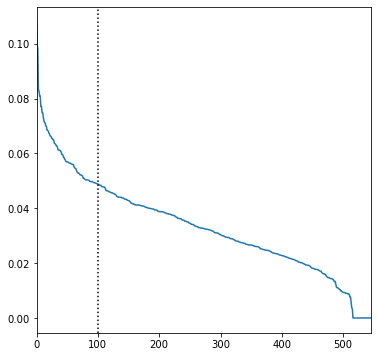

In [38]:
plt.figure(figsize=(6,6))
df['similarity'].plot()
plt.axvline(100, c='black', ls='dotted')

## The Highest Match

In [39]:
with open('data/html_job_postings/'+df.head(n=1).job_posting.values[0]) as jpost:
    display(HTML(jpost.read()))

## The Lowest Match

In [40]:
with open('data/html_job_postings/'+df.tail(n=1).job_posting.values[0]) as jpost:
    display(HTML(jpost.read()))

## Dimensionality Reduction

In [41]:
tfidf_matrix.shape

(548, 6916)

In [42]:
tfidf_matrix_sample = tfidf_matrix[1:301]

In [43]:
tfidf_matrix_sample.shape

(300, 6916)

In [44]:
svd_object = TruncatedSVD(n_components=250)

In [45]:
svd_transformed_data = svd_object.fit_transform(tfidf_matrix_sample)
normalized_tfidf = normalize(svd_transformed_data)

In [46]:
normalized_tfidf.shape

(300, 250)

In [47]:
percent_variance_coverages = 100*svd_object.explained_variance_ratio_

In [48]:
np.sum(percent_variance_coverages)

98.14620660023519

# K-Means Clustering

In [49]:
from sklearn.cluster import KMeans

In [50]:
k_values = range(1, 30)
inertia_values = [KMeans(k).fit(normalized_tfidf).inertia_ for k in k_values]

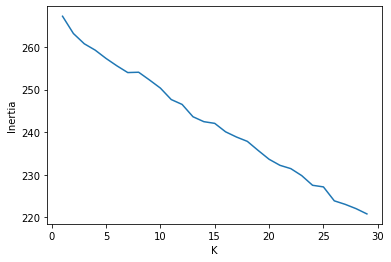

In [51]:
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [76]:
k = 15

In [77]:
df_sample = df.iloc[1:301,:]

In [78]:
np.random.seed(0)

def compute_cluster_groups(norm_mat, k=k, bullets=df_sample.requirements):
    kmodel = KMeans(n_clusters=k)
    clusters = kmodel.fit_predict(norm_mat)
    df_clustered = pd.DataFrame({'Index':range(clusters.size), 
                                 'Cluster':clusters, 
                                 'Bullet': bullets})

    return [df_cluster for _, df_cluster in df_clustered.groupby('Cluster')]

cluster_groups = compute_cluster_groups(normalized_tfidf)

In [79]:
from wordcloud import WordCloud

In [80]:
def cluster_to_image(df_cluster, max_words=20, 
                     tfidf_arr=tfidf_matrix_sample,
                     vectorizer=tfidf_vectorizer):

    indices = df_cluster.Index.values
    summed_tfidf = np.asarray(tfidf_arr[indices].sum(axis=0))[0]

    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf}
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)
    words_to_score = {word:score for word, score in df_ranked_words[:max_words].values if score!=0}
    cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
    word_cloud_image = cloud_generator.fit_words(words_to_score)
    return word_cloud_image
    
def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown', 'red', 'pink'])


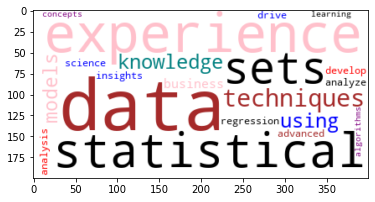

In [81]:
word_cloud_image = cluster_to_image(cluster_groups[1])
plt.imshow(word_cloud_image, interpolation="bilinear")
plt.show()

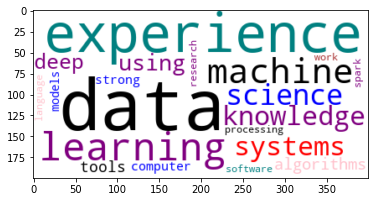

In [82]:
word_cloud_image = cluster_to_image(cluster_groups[2])
plt.imshow(word_cloud_image, interpolation="bilinear")
plt.show()

In [83]:
def print_requirements_in_cluster(c_id):
    df_clust = cluster_groups[c_id]
    for bullet in np.random.choice(df_clust.Bullet.values, 5, replace=False):
        print(f" - {bullet}\n")

In [84]:
print_requirements_in_cluster(0)

 - bachelors degree stem related discipline plus years applicable experience masters years experience applicable experience andor phd years experience degree must accredited college university data science statistics biostatistics applied mathematics computer science physics engineering technical degree relevant field bachelors degree stem related discipline plus years applicable experience masters years experience applicable experience andor phd years experience degree must accredited college university data science statistics biostatistics applied mathematics computer science physics engineering technical degree relevant field proficiency data analysis experience proficiency machine learning models logistic regression support vector machines principal component analysis clustering techniques eg kmeans hierarchical treebased techniques neural networks deep learning models proficiency python software development experience familiarity databases sql ability communicate results clearly e

In [85]:
def plot_wordcloud_all_clusters(cluster_groups=cluster_groups, k=k):
    cols = 3
    rows = k // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    axes = axes.flatten()
    
    for i in range(0, k):
        img = cluster_to_image(cluster_groups[i])
        axes[i].imshow(img, interpolation='bilinear')
        axes[i].set_title(f"Cluster {i}")
        axes[i].set_xticks([])
        axes[i].set_yticks([])

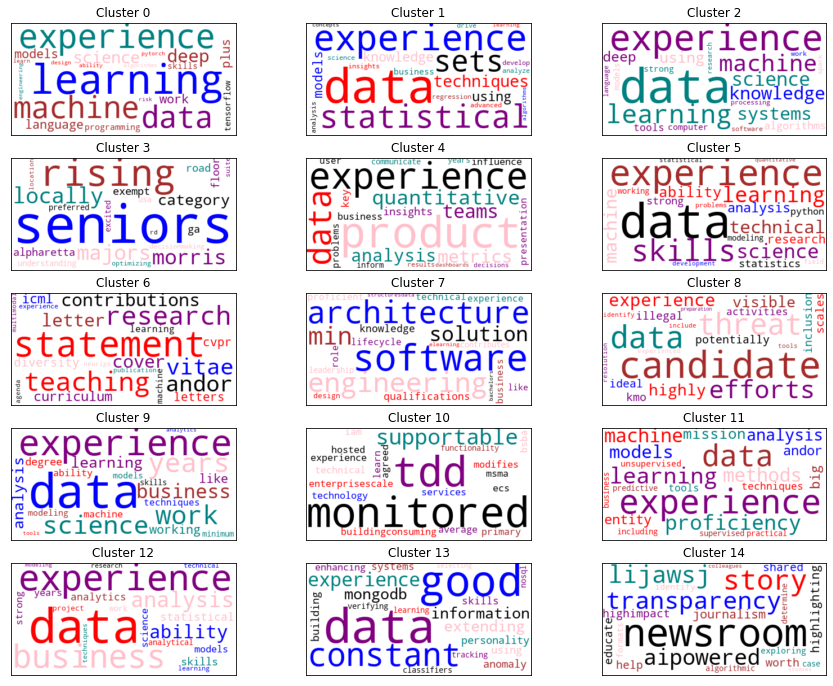

In [86]:
plot_wordcloud_all_clusters(cluster_groups)

In [87]:
print_requirements_in_cluster(13)

 - collaborate science engineering business development teams design build data interpretation solutions include machine learning models novel data visualizations analysis tools algorithms code debug programs applications develop document andor implement applicationprogram testing validation design implement software modules interfaces among applications databases analyze data sets ranging sparse datasets large data andor unstructured datasets order extract insights drive research opportunities document summarize present findings customers subject matter experts data scientists experience designing implementing data interpretation approaches address complex questions preference experience scientific questions experience developing data visualizations facilitate interpretation data insights experience use statistical predictive modeling concepts machinelearning approaches clustering classification techniques optimization algorithms experience supervised unsupervised machine learning alg